In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("hemsil2_datapoints_20102021.csv", parse_dates=True, index_col=0)
df = df[df.index < pd.Timestamp(year=2021, month=9, day=1)]
df = df.interpolate(method='linear')

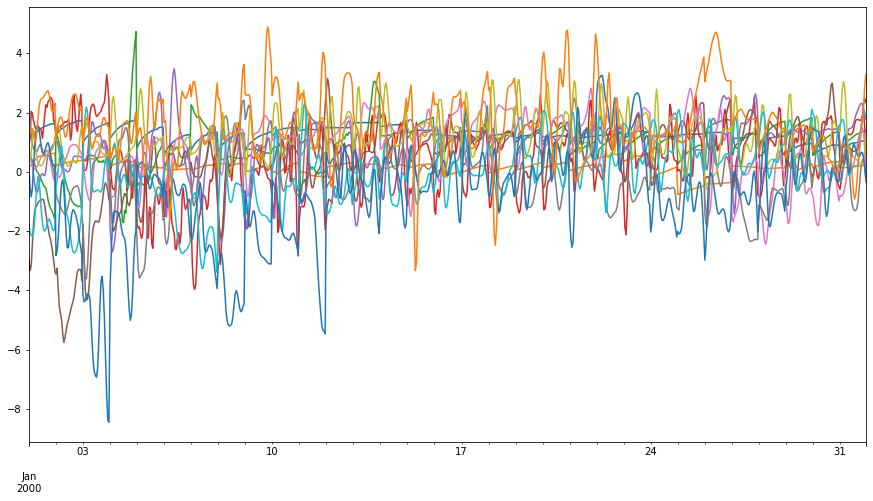

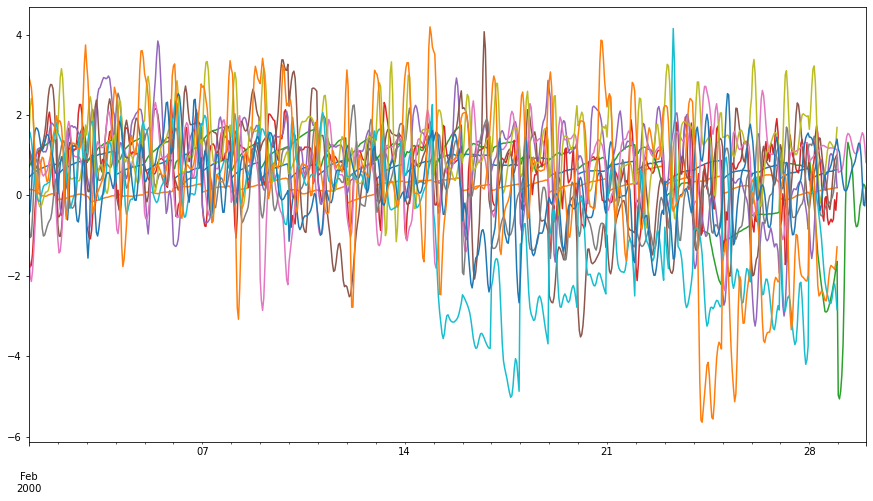

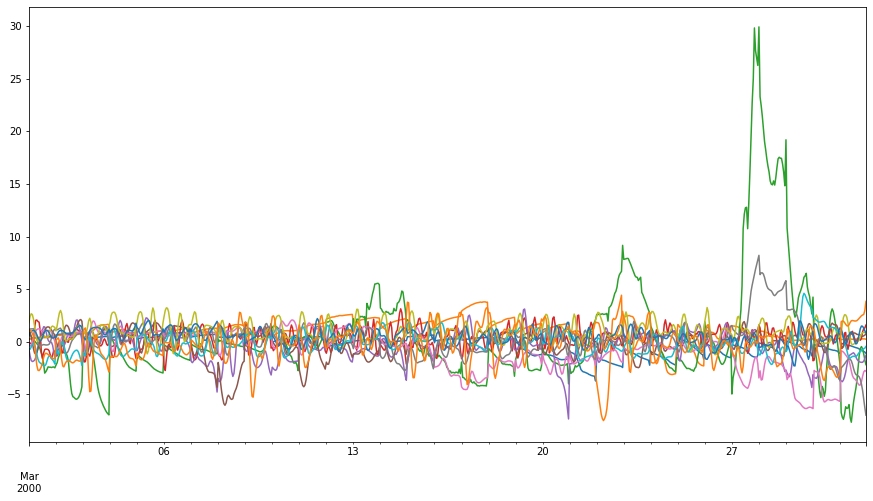

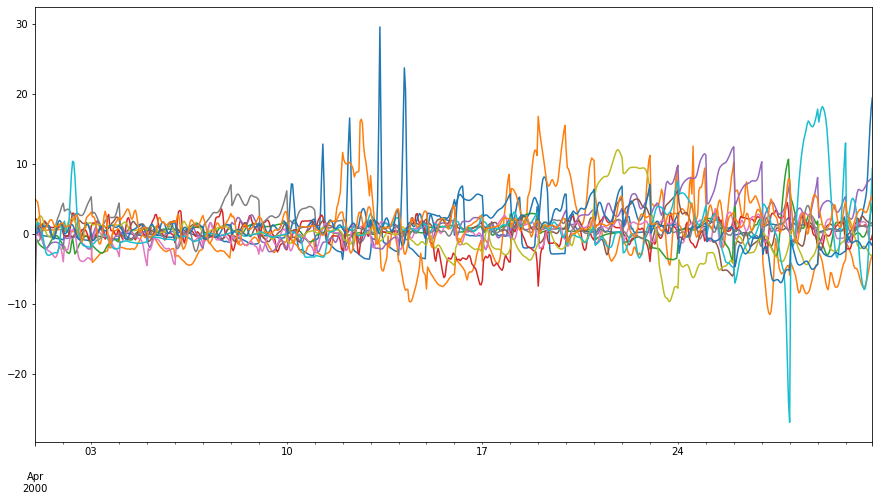

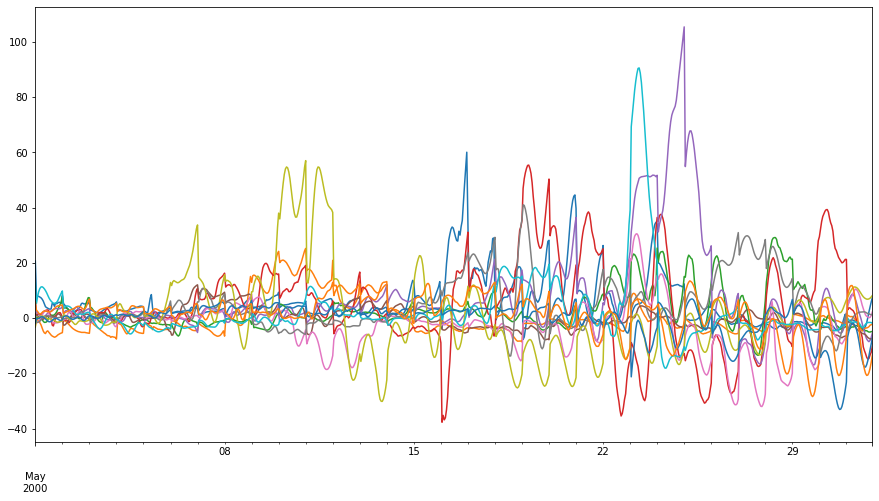

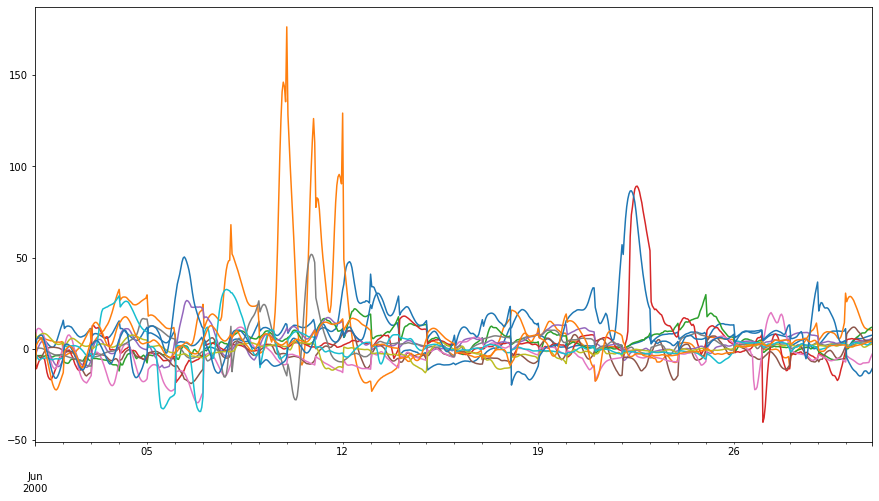

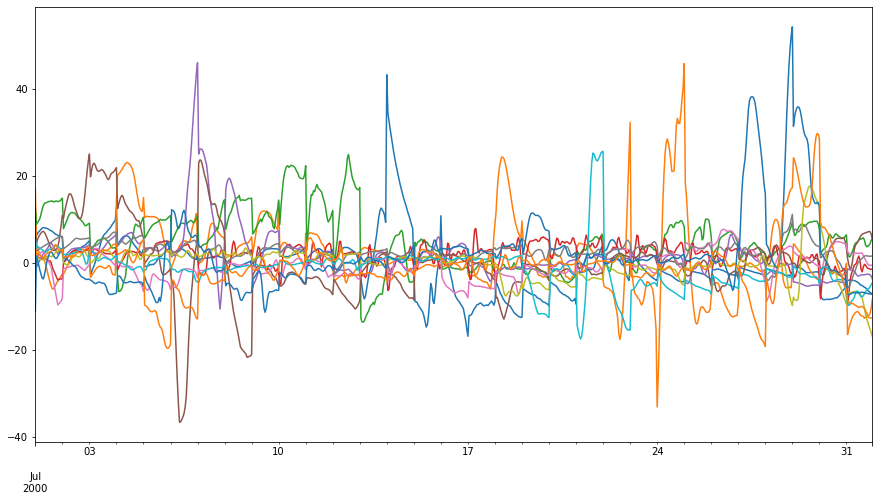

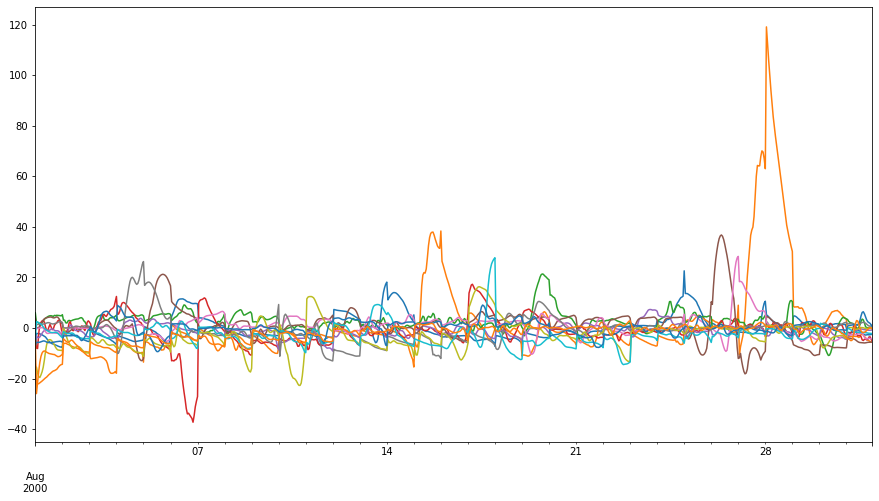

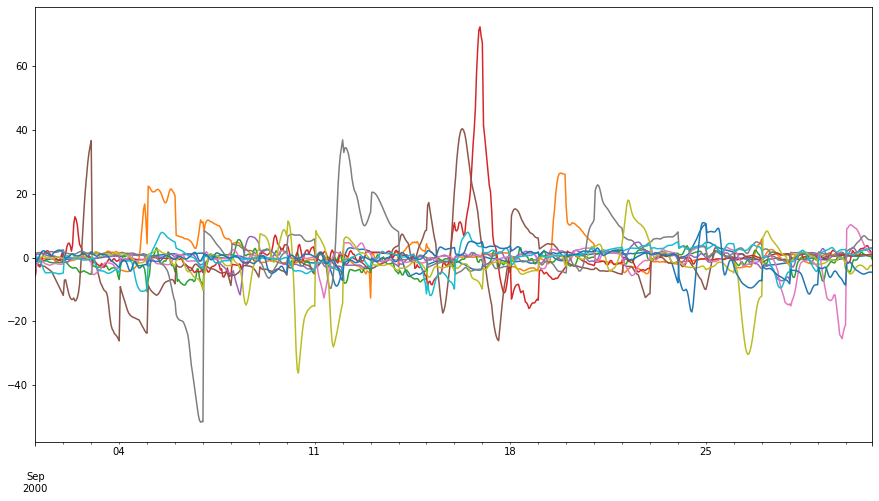

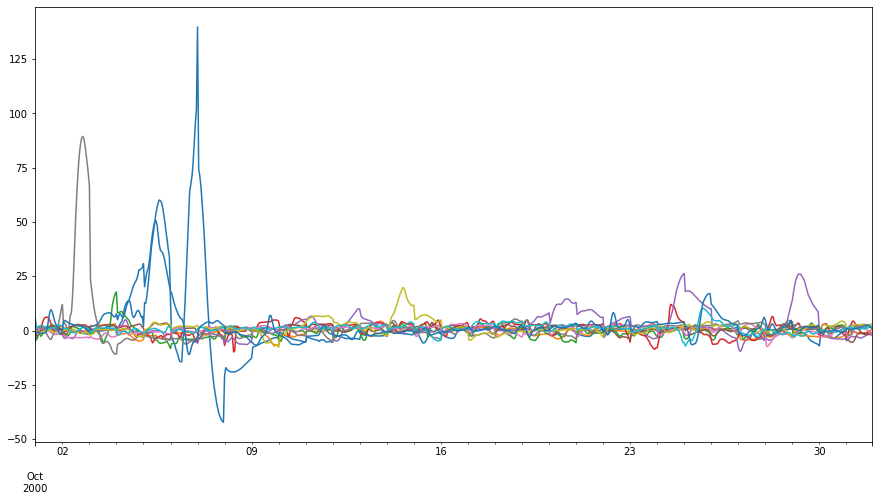

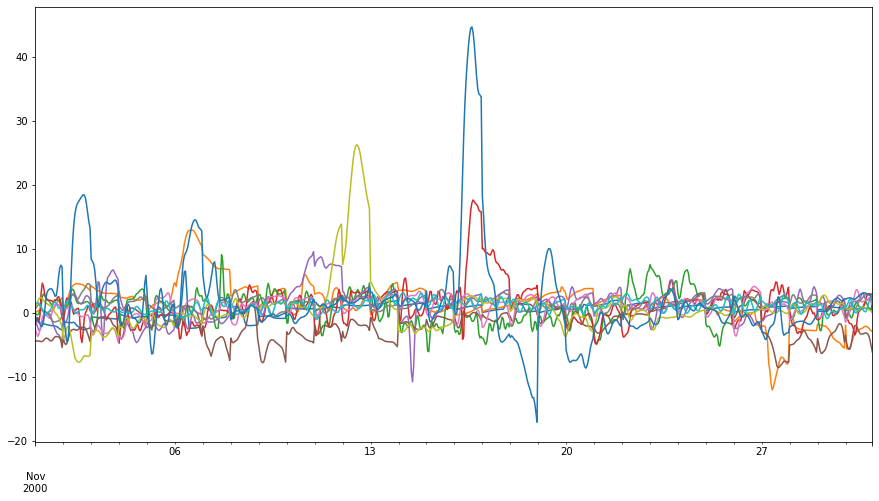

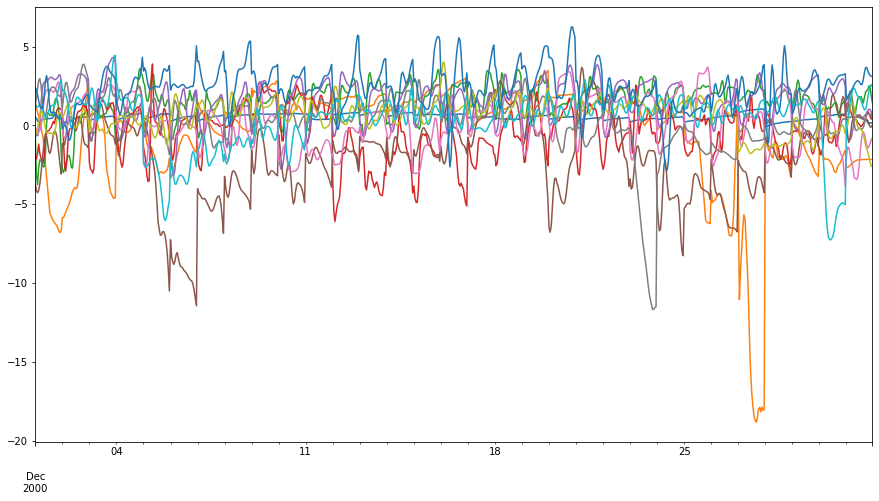

In [7]:
df["err_pred_24"] = df.apply(
    lambda row: row["hemsil2_inflow_corr"] - row["hbv_hemsil2_inflow_pred_24h"], axis=1
)
df["err_pred_48"] = df.apply(
    lambda row: row["hemsil2_inflow_corr"] - row["hbv_hemsil2_inflow_pred_48h"], axis=1
)

err24 = df["err_pred_24"]
err48 = df["err_pred_48"]

#err24.plot()
#plt.show()
#err48.plot()

import datetime

def timestamp_to_zero_year_datetime(t: pd.Timestamp) -> datetime.datetime:
    return datetime.datetime(year=2000, month=t.month, day=t.day, hour=t.hour, minute=t.minute, second=t.second)

monthgroups = err24.groupby(err24.index.month)
for _, monthgroup in monthgroups:
    for year, series in monthgroup.groupby(monthgroup.index.year):
        series.index = series.index.map(lambda t: timestamp_to_zero_year_datetime(t))
        series.plot(figsize=(15,8))
    plt.show()

    
    
#grouped.plot()

#data_df_diffs["month"] = data_df_diffs.index.month
#data_df_diffs = data_df_diffs.groupby('month').mean()

# df["rolling_flaevatn_ppt"] = df["flaevatn_ppt"].rolling(168).sum()

# df = df.iloc[168:]

# df_diffs = df[["rolling_flaevatn_ppt", "diff_24h_pred_corr", "diff_48h_pred_corr", "hbv_hemsil2_inflow_pred_24h", "hemsil2_inflow_corr"]]

# df_diffs["month"] = df_diffs.index.month
# df_diffs = df_diffs.groupby('month').mean()

# df_diffs["diff_24h_pred_corr"].plot()
# df_diffs["diff_48h_pred_corr"].plot()
# df_diffs

# df_diffs.head()
